# Starbucks Capstone Challenge

High-level overview:
This project uses Starbucks data from the rewards program to engage with customers on various offers Starbucks has. The motivation for this project is that I am a regular Starbucks customer and I wanted to utilize this dataset to understand how Starbucks reward programs work. The scope of the project is restricted to predicting if a customer will complete an offer based on the customer's age and income.
Problem Statement-
The problem selected for this project is to predict if a customer will complete an offer based on the customer's age and income. This is significant in addressing so that Starbucks can utilize the most appropriate offers targeted to the relevant age and income groups hence increase sales.

In [1]:
#import the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#read the json files into pandas data frames
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
#describe the data
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [4]:
#describe the datatypes
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [5]:
#describe the data
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [6]:
#describe the datatypes
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [7]:
#describe the data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [8]:
#describe the datatypes
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [9]:
#get the first few records to understand the data
profile.head(5)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
#get the first few records to understand the data
portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [11]:
#get the first few records to understand the data
transcript.head(5)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


array([[<Axes: title={'center': 'time'}>]], dtype=object)

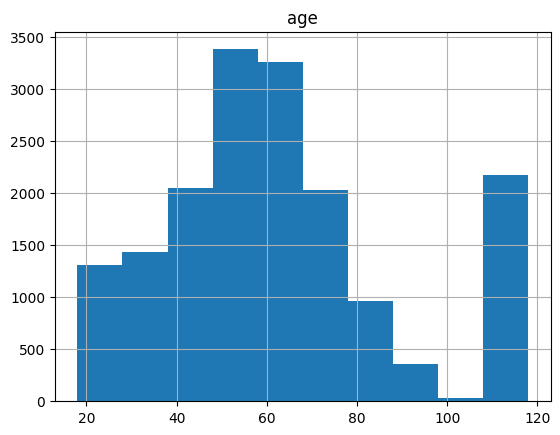

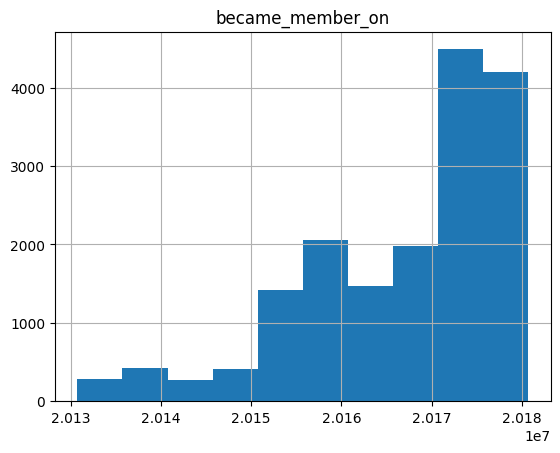

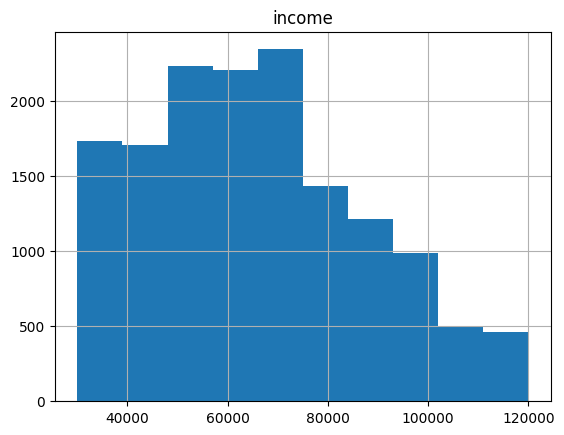

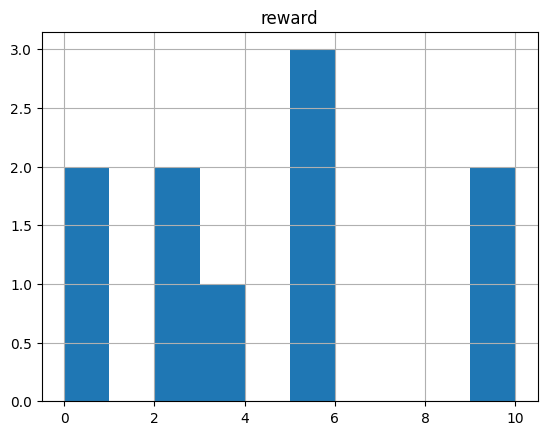

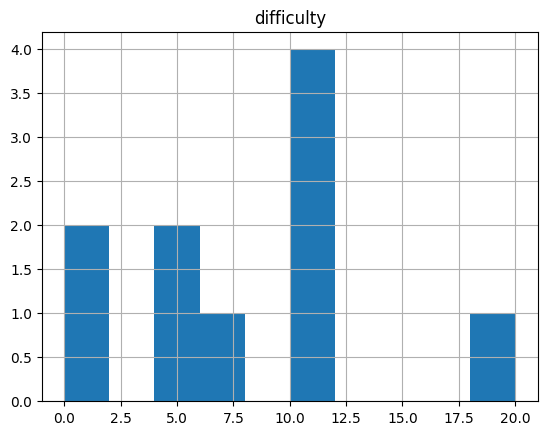

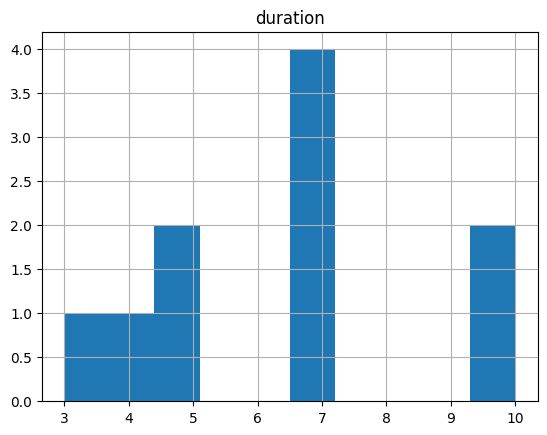

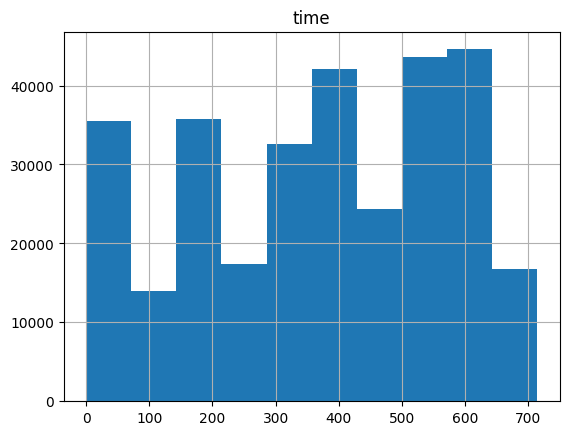

In [12]:
#visualize the spread of the data
profile.hist(column='age')
profile.hist(column='became_member_on')
profile.hist(column='income')

portfolio.hist(column='reward')
portfolio.hist(column='difficulty')
portfolio.hist(column='duration')

transcript.hist(column='time')

In [13]:
#check for nulls
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [14]:
#check for nulls
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [15]:
#check for nulls
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [16]:
#drop duplicates
profile.drop_duplicates()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [17]:
#clean the data
#find the mean value in the dataset
profile['age'].mean()
#replace the outlier with the mean value
profile['age'].replace(118,63,inplace=True)

#find the mode value in the dataset
profile['gender'].mode()
#replace the nulls with the mode value
profile['gender'].fillna('M',inplace=True)

#find the mode value in the dataset
profile['income'].mode()
#replace the nulls with the mode value
profile['income'].fillna(73000,inplace=True)

In [18]:
#rerun all the exploration code above to ensure the data is now clean

In [19]:
#rename the id column to be unique when combining with other id columns in other datasets
profile.rename(columns={'id':'profileid'}, inplace=True)
portfolio.rename(columns={'id':'portfolioid'}, inplace=True)

In [20]:
#extract the first values
transcript['firstvalues'] = transcript['value'].apply(lambda x: list(x.values())[0])
#assign the amount values when there is a transaction
transcript.loc[transcript['event']=='transaction','amountvalue']=transcript['firstvalues']  
#assign the offer completed when there is an offer completed
transcript['offercompleted']=transcript['event'].str.contains("offer completed")
#assign the column as int
transcript['offercompleted']=transcript['offercompleted'].astype(int)
#assign column for bogo
portfolio['offerbogo']=portfolio['offer_type'].str.contains("bogo")
#assign the column as int
portfolio['offerbogo']=portfolio['offerbogo'].astype(int)
#assign column for informational
portfolio['offerinformational']=portfolio['offer_type'].str.contains("informational")
#assign the column as int
portfolio['offerinformational']=portfolio['offerinformational'].astype(int)
#assign column for discount
portfolio['offerdiscount']=portfolio['offer_type'].str.contains("discount")
#assign the column as int
portfolio['offerdiscount']=portfolio['offerdiscount'].astype(int)
#remove rows where the offer is informational
portfolio.drop(portfolio[portfolio['offerinformational']==1].index, inplace=True)

In [21]:
#merge datasets for further processing into new data frame
trxns = pd.merge(portfolio,transcript, left_on="portfolioid", right_on="firstvalues", how='inner')

In [22]:
#merge datasets for further processing
trxns=pd.merge(trxns,profile, left_on="person", right_on="profileid")

In [23]:
#summarize the data
trxns.describe()

,reward,difficulty,duration,offerbogo,offerinformational,offerdiscount,time,offercompleted,age,became_member_on,income
count,141515.000000,141515.000000,141515.000000,141515.000000,141515.0,141515.000000,141515.000000,141515.000000,141515.000000,1.415150e+05,141515.000000
mean,5.234025,9.296386,7.192700,0.506074,0.0,0.493926,355.953927,0.237282,55.701523,2.016656e+07,67283.729640
std,3.035536,4.092034,1.783395,0.499965,0.0,0.499965,198.172446,0.425418,16.413263,1.160007e+04,20437.199192
min,2.000000,5.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.000000,18.000000,2.013073e+07,30000.000000
25%,2.000000,7.000000,5.000000,0.000000,0.0,0.000000,174.000000,0.000000,45.000000,2.016050e+07,52000.000000
50%,5.000000,10.000000,7.000000,1.000000,0.0,0.000000,408.000000,0.000000,58.000000,2.017062e+07,69000.000000
75%,10.000000,10.000000,7.000000,1.000000,0.0,1.000000,510.000000,0.000000,65.000000,2.017122e+07,79000.000000
max,10.000000,20.000000,10.000000,1.000000,0.0,1.000000,714.000000,1.000000,101.000000,2.018073e+07,120000.000000


In [24]:
#get the first few records to understand the data
trxns.head()

,reward,channels,difficulty,duration,offer_type,portfolioid,offerbogo,offerinformational,offerdiscount,person,...,value,time,firstvalues,amountvalue,offercompleted,gender,age,profileid,became_member_on,income
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
1,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},102,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},504,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
3,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,...,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},510,ae264e3637204a6fb9bb56bc8210ddfd,NaN,0,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0
4,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,0,0,4b0da7e80e5945209a1fdddfe813dbe0,...,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,510,ae264e3637204a6fb9bb56bc8210ddfd,NaN,1,M,64,4b0da7e80e5945209a1fdddfe813dbe0,20170909,100000.0


In [25]:
#explore the merged data
trxns.groupby(['event','offer_type'])['event'].count()

event            offer_type
offer completed  bogo          15669
                 discount      17910
offer received   bogo          30499
                 discount      30543
offer viewed     bogo          25449
                 discount      21445
Name: event, dtype: int64

In [26]:
#review the data in Excel
profile.to_excel("profile.xlsx")
#review the data in Excel
portfolio.to_excel("portfolio.xlsx")
#review the data in Excel
transcript.to_excel("transcript.xlsx")
#review the data in Excel
trxns.to_excel("trxns.xlsx")

In [27]:
#drop the columns which are not needed
trxns = trxns.drop(['gender','profileid','channels','offer_type','portfolioid','person','event','value','time','firstvalues','amountvalue','offerinformational','offerdiscount','offerbogo','difficulty','duration','reward','became_member_on'], axis=1)


In [28]:
#assign the data frame to X
X = trxns.drop('offercompleted',axis=1)

In [29]:
#assign the data frame to y
y = trxns['offercompleted']

In [30]:
#split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.80,random_state=100)

In [31]:
#create the decision tree model
decisiontreemodel = tree.DecisionTreeClassifier(random_state = 0)

In [32]:
#fit the decision tree model
decisiontreemodel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
#test the prediction of the decision tree model
testdecisiontreeprediction = decisiontreemodel.predict(X_test)

In [34]:
#generate the confusion matrix for the decision tree model
confusionmatrixdecisiontree=confusion_matrix(y_test,testdecisiontreeprediction)

In [35]:
#show the confusion matrix for the decision tree model
confusionmatrixdecisiontree

array([[21476,    69],
       [ 6756,     2]])

In [36]:
#generate the display for the confusion matrix for the decision tree model
dispdecisiontree = ConfusionMatrixDisplay(confusion_matrix=confusionmatrixdecisiontree)

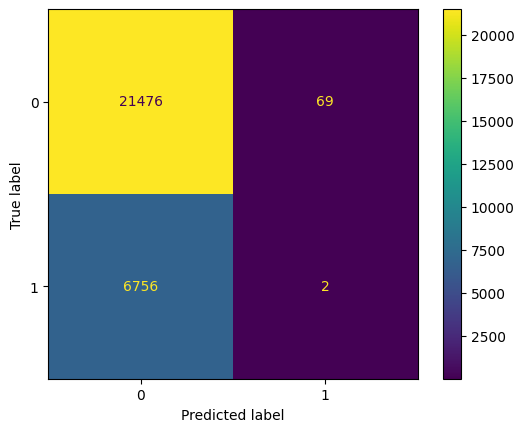

In [37]:
#plot the display for the confusion matrix for the decision tree model
dispdecisiontree.plot()

In [38]:
#generate the accuracy score for the decision tree model
accuracydecisiontree = metrics.accuracy_score(y_test,testdecisiontreeprediction)

In [39]:
#print the accuracy score for the decision tree model
print(accuracydecisiontree)

0.7588594848602621


In [40]:
#create the random forest model
randomforestmodel = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [41]:
#fit the random forest model
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
#test the prediction of the random forest model
testrandomforestprediction = randomforestmodel.predict(X_test)

In [43]:
#generate the confusion matrix for the random forest model
randomforestconfusionmatrix=confusion_matrix(y_test,testrandomforestprediction)

In [44]:
#show the confusion matrix for the random forest model
randomforestconfusionmatrix

array([[21399,   146],
       [ 6749,     9]])

In [45]:
#generate the display for the confusion matrix for the random forest model
disprandomforest = ConfusionMatrixDisplay(confusion_matrix=randomforestconfusionmatrix)

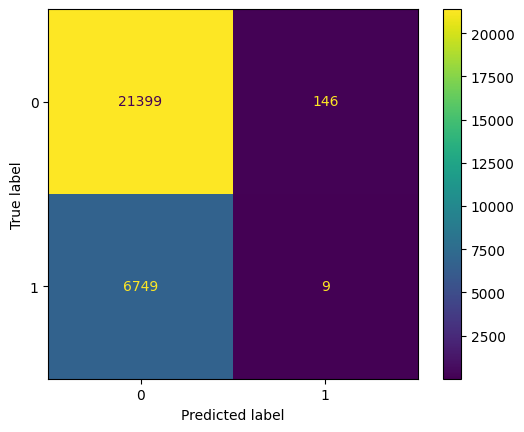

In [46]:
#plot the display for the confusion matrix for the random forest model
disprandomforest.plot()

In [47]:
#generate the accuracy score for the random forest model
accuracyrandomforest = metrics.accuracy_score(y_test,testrandomforestprediction)

In [48]:
#print the accuracy score for the random forest model
print(accuracyrandomforest)

0.7563862488075469


In [49]:
#generator the list of parameters to use for hyperparameter tuning
parametergrid = {'n_estimators':[5,10,15,20],'max_depth':[5,10,15,20]}

In [50]:
#try gridsearchCV as option 1
gridsearch=GridSearchCV(RandomForestClassifier(),param_grid=parametergrid)

In [51]:
#fit the model via gridsearchCV
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [5, 10, 15, 20]})

In [52]:
#show the suggested best parameter values to use via gridsearchCV
print(gridsearch.best_params_)

{'max_depth': 5, 'n_estimators': 5}


In [53]:
#try randomsearchCV as option 2
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parametergrid)

In [54]:
#fit the model via randomsearchCV
randomsearch.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'n_estimators': [5, 10, 15, 20]})

In [55]:
#show the suggested best parameter values to use via randomsearchCV
print(randomsearch.best_params_)

{'n_estimators': 10, 'max_depth': 5}
